In [1]:
from mylib.statistic_test import *

code_id = '0344 - Convergent Dynamics'
loc = os.path.join(figpath, code_id)
mkdir(loc)

with open(r"E:\Anaconda\envs\maze\Lib\site-packages\mylib\test\demo_seq.pkl", 'rb') as handle:
    template_seq = pickle.load(handle)

from mylib.model import ProbabilityRNN, ContinuousHiddenStateModel
from mylib.model import FeatureKnockOut

M53 = ContinuousHiddenStateModel('poly2')
M53.fit(template_seq)

def func(M53 = M53):
    simu_reg, simu_identity = M53.simulate_across_day(n_step=200, n_fields=10000, is_noise=True)

    predicted_prob = np.zeros((simu_reg.shape[0], simu_reg.shape[1]-1)) * np.nan

    for i in range(simu_reg.shape[0]):
        idx = np.where(simu_reg[i, :] == 1)[0][0]
        predicted_prob[i, idx:] = M53.get_predicted_prob([simu_reg[i, idx:]], is_noise=True)[0]

    predicted_prob *= simu_identity[:, 1:]
    
    return predicted_prob, simu_reg, simu_identity

datasaveloc = join(figdata, code_id)
mkdir(datasaveloc)

if exists(join(datasaveloc, '[General].pkl')):
    with open(join(datasaveloc, '[General].pkl'), 'rb') as handle:
        Data = pickle.load(handle)
else:
    Data = {
        "Iteration": [],
        "Step": [],
        "P": [],
        "PMF": []
    }
    
    for j in range(5):
        print(f"Iteration Time: {j}")
        predicted_prob, simu_reg, simu_identity = func()
        with open(join(datasaveloc, f'SFER General {j}.pkl'), 'wb') as handle:
            pickle.dump((predicted_prob, simu_reg, simu_identity), handle)
            #predicted_prob, simu_reg, simu_identity = pickle.load(handle)

        mat = np.zeros((40, 199), np.float64)
        for i in tqdm(range(199)):
            mat[:, i] = np.histogram(
                predicted_prob[np.where(np.isnan(predicted_prob[:, i]) == False), i],
                range=(0,1),
                bins=40,
                density=True
            )[0]
        
            Data["Iteration"].append(np.repeat(j, 40))
            Data["Step"].append(np.repeat(i, 40))
            Data["P"].append(np.linspace(0, 1, 40))
            Data["PMF"].append(mat[:, i] / np.sum(mat[:, i]))
    
    for k in Data.keys():
        Data[k] = np.concatenate(Data[k])
        
    with open(join(datasaveloc, '[General].pkl'), 'wb') as handle:
        pickle.dump(Data, handle)
    
    D = pd.DataFrame(Data)
    D.to_excel(join(datasaveloc, '[General].xlsx'), index=False)

e:\Anaconda\envs\maze\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


        E:\Data\FinalResults\0344 - Convergent Dynamics is already existed!
Using device: cuda
Using device: cuda
        E:\Data\FigData\0344 - Convergent Dynamics is already existed!


In [2]:
with open(join(figdata, code_id, "SFER General [1000 Sessions].pkl"), 'rb') as handle:
    predicted_prob, simu_reg, simu_identity = pickle.load(handle)

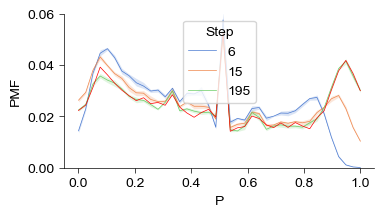

In [8]:
mat = np.zeros((40, 998), np.float64)
for i in range(998):
    mat[:, i] = np.histogram(
        predicted_prob[np.where(np.isnan(predicted_prob[:, i]) == False)[0], i],
        range=(0, 1),
        bins=40,
        density=True
    )[0]
idx = np.where(np.isin(Data['Step'], [6, 15, 195]))[0]
SubData = SubDict(Data, Data.keys(), idx)
fig = plt.figure(figsize = (4, 2))
ax = Clear_Axes(plt.axes(), ifxticks=True, ifyticks=True, close_spines=['top', 'right'])
sns.lineplot(
    x="P",
    y="PMF",
    hue="Step",
    data=SubData,
    ax=ax,
    linewidth=0.5,
    err_kws={"linewidth": 0},
    palette="muted",
)
ax.plot(np.linspace(0, 1, 40), mat[:, -1]/np.sum(mat[:, -1]), linewidth = 0.5, color = 'r')
ax.set_ylim(0, 0.06)
plt.savefig(join(loc, 'P distribution evolution.png') , dpi = 600)
plt.savefig(join(loc, 'P distribution evolution.svg') , dpi = 600)
plt.show()

In [ ]:
mat = np.zeros((41, 998), np.float64)
for i in range(998):
    mat[:, i] = np.histogram(
        predicted_prob[np.where(np.isnan(predicted_prob[:, i]) == False)[0], i],
        range=(-0.0125,1.0125),
        bins=41,
        density=True
    )[0]

mat_n = mat / np.max(mat, axis = 0)
fig = plt.figure(figsize = (8, 2))
ax = Clear_Axes(plt.axes(), ifxticks=True, ifyticks=True)
im = ax.imshow(mat_n[:, 200], vmin = 0, vmax = 1, aspect='auto', interpolation=None)
plt.savefig(join(loc, "Pt Distribution Heatmap.svg"), dpi = 2400)
plt.savefig(join(loc, "Pt Distribution Heatmap.png"), dpi = 2400)

ax.set_yticks(np.linspace(0, 40, 9))
plt.colorbar(im, ax=ax)
ax.set_aspect("auto")
ax.set_xticks(np.linspace(0, 1000, 11))
ax.set_xlim([0, 1000])
ax.invert_yaxis()
plt.savefig(join(loc, "Distribution of Predicted Probability.svg"), dpi = 2400)
plt.savefig(join(loc, "Distribution of Predicted Probability.png"), dpi = 600)
plt.show()

fig = plt.figure(figsize = (4, 2))
ax = Clear_Axes(plt.axes(), ifxticks=True, ifyticks=True, close_spines=['top', 'right'])
ax.plot(mat_n[:, 6], linewidth=0.5, color="black")
ax.set_xlim([-0.5, 40.5])
ax.set_xticks(np.linspace(0, 40, 9))
print(np.max(mat[:, 6])/40)
plt.savefig(join(loc, "Distribution of Predicted Probability [d7].svg"), dpi = 2400)
plt.savefig(join(loc, "Distribution of Predicted Probability [d7].svg"), dpi = 600)
plt.show()

fig = plt.figure(figsize = (4, 2))
ax = Clear_Axes(plt.axes(), ifxticks=True, ifyticks=True, close_spines=['top', 'right'])
ax.plot(mat_n[:, 158], linewidth=0.5, color="black")
ax.set_xlim([-0.5, 40.5])
ax.set_xticks(np.linspace(0, 40, 9))
plt.savefig(join(loc, "Distribution of Predicted Probability [d200].svg"), dpi = 2400)
plt.savefig(join(loc, "Distribution of Predicted Probability [d200].svg"), dpi = 600)
plt.show()

In [ ]:
PermanentSilent = np.zeros(predicted_prob.shape[1])
for i in range(predicted_prob.shape[1]):
    idx = np.where((np.nansum(simu_identity[:, :i+1], axis=1) >= 1) & (np.isnan(simu_identity[:, i+1]) == True))[0]
    PermanentSilent[i] = idx.shape[0]

        E:\Data\FinalResults\0344 - Convergent Dynamics is already existed!
(5174,)
(5174,)
(5174,)
(5174,)
(5174,)
0 198


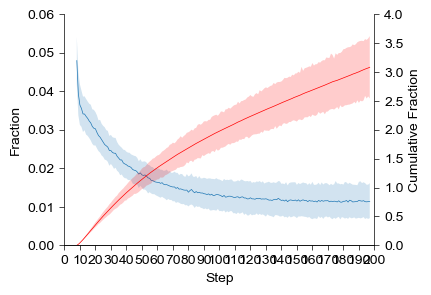

In [3]:
from mylib.statistic_test import *

code_id = '0344 - Convergent Dynamics'
loc = os.path.join(figpath, code_id)
mkdir(loc)
from mylib.model import ProbabilityRNN, ContinuousHiddenStateModel
from mylib.model import FeatureKnockOut
file_loc = join(figpath, "0337 - Model Losses")

if exists(join(figdata, code_id+'[All Mice].pkl')):
    with open(join(figdata, code_id+'[All Mice].pkl'), 'rb') as handle:
        SData = pickle.load(handle)
        
    for k in SData.keys():
        print(SData[k].shape)
else:
    SData = {
        "Step": [],
        "Fraction": [],
        "Cumulative Fraction": [],
        "MiceID": [],
        "Paradigm": []
    }
    
    for k in tqdm(range(len(f_CellReg_modi))):
        if f_CellReg_modi['Type'][k] != 'Real' or f_CellReg_modi['maze_type'][k] == 0:
            continue
        
        with open(f_CellReg_modi['Trace File'][k], 'rb') as handle:
            trace = pickle.load(handle)  
              
        if f_CellReg_modi['paradigm'][k] == 'CrossMaze':
            paradigm = 'MA' if f_CellReg_modi['maze_type'][k] == 1 else 'MB'

            
            if 'simu_reg_200' in trace.keys():
                simu_reg, simu_identity = trace['simu_reg_200'], trace['simu_identity_200']
            else:
                with open(join(file_loc, f'{int(f_CellReg_modi["MiceID"][k])}_{paradigm}.pkl'), 'rb') as handle:
                    res = pickle.load(handle)
            
                M53: ContinuousHiddenStateModel = res[-5]
                simu_reg, simu_identity = M53.simulate_across_day(200, n_fields=10000)
            
                trace['simu_reg_200'] = simu_reg
                trace['simu_identity_200'] = simu_identity
            
                with open(f_CellReg_modi['Trace File'][k], 'wb') as handle:
                    pickle.dump(trace, handle)
            
            drifted_field = np.zeros(simu_reg.shape[1]-1)
            total_drifted_field = np.zeros(simu_reg.shape[1]-1)
            for j in range(drifted_field.shape[0]-1):
                idx = np.where(
                    (np.isnan(simu_identity[:, j+1]) == True) & (np.isnan(simu_identity[:, j]) == False)
                )[0]
                
                denominator = np.where((np.isnan(simu_identity[:, j+1]) == False))[0].shape[0]
                
                if denominator > 0:
                    drifted_field[j] = idx.shape[0] / denominator
                    
                idx2 = np.where(
                    (np.isnan(simu_identity[:, j+1]) == True) & (np.nansum(simu_reg[:, :j+1], axis=1) > 1)
                )[0]
                
                total_drifted_field[j] = idx2.shape[0] / denominator
                
            SData['Step'].append(np.arange(drifted_field.shape[0]))
            SData['Fraction'].append(drifted_field)
            SData['MiceID'].append(np.repeat(f_CellReg_modi['MiceID'][k], drifted_field.shape[0]))
            SData['Paradigm'].append(np.repeat(paradigm, drifted_field.shape[0]))
            SData['Cumulative Fraction'].append(total_drifted_field)
                          
        else:
            info = {"ReverseMaze": ["MAf", "MAb"], "HairpinMaze": ["HPf", "HPb"]}
            directions = ['cis', 'trs']
            for n, paradigm in enumerate(info[f_CellReg_modi['paradigm'][k]]):
                
                if 'simu_reg_200' in trace[directions[n]].keys():
                    simu_reg, simu_identity = trace[directions[n]]['simu_reg_200'], trace[directions[n]]['simu_identity_200']
                else:
                    with open(join(file_loc, f'{int(f_CellReg_modi["MiceID"][k])}_{paradigm}.pkl'), 'rb') as handle:
                        res = pickle.load(handle)
                
                    M53: ContinuousHiddenStateModel = res[-5]
                    simu_reg, simu_identity = M53.simulate_across_day(200, n_fields=10000)
            
                    trace[directions[n]]['simu_reg_200'] = simu_reg
                    trace[directions[n]]['simu_identity_200'] = simu_identity
            
                    with open(f_CellReg_modi['Trace File'][k], 'wb') as handle:
                        pickle.dump(trace, handle)
            
                drifted_field = np.zeros(simu_reg.shape[1]-1)
                total_drifted_field = np.zeros(simu_reg.shape[1]-1)
                for j in range(drifted_field.shape[0]-1):
                    idx = np.where(
                        (np.isnan(simu_identity[:, j+1]) == True) & (np.isnan(simu_identity[:, j]) == False)
                    )[0]
                
                    denominator = np.where((np.isnan(simu_identity[:, j+1]) == False))[0].shape[0]
                
                    if denominator > 0:
                        drifted_field[j] = idx.shape[0] / denominator
                        
                    idx2 = np.where(
                        (np.isnan(simu_identity[:, j+1]) == True) & (np.nansum(simu_reg[:, :j+1], axis=1) > 1)
                    )[0]
                
                    total_drifted_field[j] = idx2.shape[0] / denominator
                
                SData['Step'].append(np.arange(drifted_field.shape[0]))
                SData['Fraction'].append(drifted_field)
                SData['MiceID'].append(np.repeat(f_CellReg_modi['MiceID'][k], drifted_field.shape[0]))
                SData['Paradigm'].append(np.repeat(paradigm, drifted_field.shape[0]))
                SData['Cumulative Fraction'].append(total_drifted_field)
                
                    
    for k in SData.keys():
        SData[k] = np.concatenate(SData[k])
        
    with open(join(figdata, code_id+'[All Mice].pkl'), 'wb') as handle:
        pickle.dump(SData, handle)
    
    SD = pd.DataFrame(SData)
    SD.to_excel(join(figdata, code_id+'[All Mice].xlsx'), index=False)

print(np.min(SData['Step']), np.max(SData['Step']))
idx = np.where((SData['Step'] >= 8) & (SData['Step'] <= 197))[0]
SubData = SubDict(SData, SData.keys(), idx)
fig = plt.figure(figsize=(4, 3))
ax = Clear_Axes(plt.axes(), ifxticks=True, ifyticks=True, close_spines=['top', 'right'])
sns.lineplot(
    x='Step',
    y='Fraction',
    data=SubData,
    ax=ax,
    linewidth=0.5,
    err_kws={"edgecolor": None}
)
ax.set_xlim([0, 200])
ax.set_xticks(np.linspace(0, 200, 21))
ax.set_ylim([0, 0.06])

twin = Clear_Axes(ax.twinx(), ifxticks=True, ifyticks=True, close_spines=['top', 'left'])
sns.lineplot(
    x='Step',
    y='Cumulative Fraction',
    data=SubData,
    ax=twin,
    linewidth=0.5,
    err_kws={"edgecolor": None},
    color='red'
)
twin.set_ylim([0, 4])
plt.savefig(join(loc, "Convergently Drift Rate.svg"), dpi = 2400)
plt.savefig(join(loc, "Convergently Drift Rate.png"), dpi = 2400)

In [1]:
from mylib.statistic_test import *

code_id = '0344 - Convergent Dynamics'
loc = os.path.join(figpath, code_id)
mkdir(loc)

with open(r"E:\Anaconda\envs\maze\Lib\site-packages\mylib\test\demo_seq.pkl", 'rb') as handle:
    template_seq = pickle.load(handle)

from mylib.model import ProbabilityRNN, ContinuousHiddenStateModel
from mylib.model import FeatureKnockOut

M53 = ContinuousHiddenStateModel('poly2')
M53.fit(template_seq)

def func(M53 = M53):
    simu_reg, simu_identity = M53.simulate_across_day(n_step=200, n_fields=10000, is_noise=False, is_gated=False)

    predicted_prob = np.zeros((simu_reg.shape[0], simu_reg.shape[1]-1)) * np.nan

    for i in tqdm(range(simu_reg.shape[0])):
        idx = np.where(simu_reg[i, :] == 1)[0][0]
        predicted_prob[i, idx:] = M53.get_predicted_prob([simu_reg[i, idx:]], is_noise=True)[0]

    predicted_prob *= simu_identity[:, 1:]
    
    return predicted_prob, simu_reg, simu_identity

datasaveloc = join(figdata, code_id)
mkdir(datasaveloc)

if exists(join(datasaveloc, ' [No Gate Pt Distribution].pkl')):
    with open(join(datasaveloc, '[No Gate Pt Distribution].pkl'), 'rb') as handle:
        Data = pickle.load(handle)
else:
    Data = {
        "Iteration": [],
        "Step": [],
        "P": [],
        "PMF": []
    }
    
    for j in range(15, 20):
        print(f"Iteration Time: {j}")
        predicted_prob, simu_reg, simu_identity = func()
        with open(join(datasaveloc, f'SFER General {j}.pkl'), 'wb') as handle:
            pickle.dump((predicted_prob, simu_reg, simu_identity), handle)
            #predicted_prob, simu_reg, simu_identity = pickle.load(handle)

        mat = np.zeros((40, 199), np.float64)
        for i in tqdm(range(199)):
            mat[:, i] = np.histogram(
                predicted_prob[np.where(np.isnan(predicted_prob[:, i]) == False), i],
                range=(0,1),
                bins=40,
                density=True
            )[0]
        
            Data["Iteration"].append(np.repeat(j, 40))
            Data["Step"].append(np.repeat(i, 40))
            Data["P"].append(np.linspace(0, 1, 40))
            Data["PMF"].append(mat[:, i] / np.sum(mat[:, i]))
    
    for k in Data.keys():
        Data[k] = np.concatenate(Data[k])
        
    with open(join(datasaveloc, '[No Gate Pt Distribution].pkl'), 'wb') as handle:
        pickle.dump(Data, handle)
    
    D = pd.DataFrame(Data)
    D.to_excel(join(datasaveloc, '[No Gate Pt Distribution].xlsx'), index=False)
    
idx = np.where(np.isin(Data['Step'], [6, 29, 195]))[0]
SubData = SubDict(Data, Data.keys(), idx)
fig = plt.figure(figsize = (4, 2))
ax = Clear_Axes(plt.axes(), ifxticks=True, ifyticks=True, close_spines=['top', 'right'])
sns.lineplot(
    x="P",
    y="PMF",
    hue="Step",
    data=SubData,
    ax=ax,
    linewidth=0.5,
    err_kws={"linewidth": 0},
    palette="muted",
)
ax.set_ylim(0, 0.06)
plt.savefig(join(loc, 'P distribution evolution [no gate].png') , dpi = 600)
plt.savefig(join(loc, 'P distribution evolution [no gate].svg') , dpi = 600)
plt.show()

e:\Anaconda\envs\maze\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


        E:\Data\FinalResults\0344 - Convergent Dynamics is already existed!
Using device: cuda
Using device: cuda
        E:\Data\FigData\0344 - Convergent Dynamics is already existed!
Iteration Time: 15


  1%|          | 10000/1873718 [00:48<2:30:48, 205.96it/s]


IndexError: index 0 is out of bounds for axis 0 with size 0

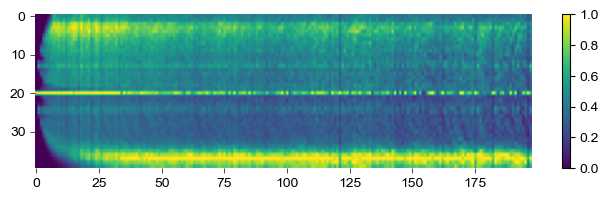

In [4]:
with open(join(datasaveloc, f'SFER General {16}.pkl'), 'rb') as handle:
    predicted_prob, simu_reg, simu_identity = pickle.load(handle)
    
mat = np.zeros((40, 198), np.float64)
for i in range(198):
    mat[:, i] = np.histogram(
        predicted_prob[np.where(np.isnan(predicted_prob[:, i]) == False)[0], i],
        range=(0, 1),
        bins=40,
        density=True
    )[0]

mat_n = mat / np.max(mat, axis = 0)
fig = plt.figure(figsize = (8, 2))
ax = Clear_Axes(plt.axes(), ifxticks=True, ifyticks=True)
im = ax.imshow(mat_n[:, :200], vmin = 0, vmax = 1, aspect='auto', interpolation=None)
plt.colorbar(im, ax = ax)
plt.savefig(join(loc, "Pt Distribution Heatmap [no gate].svg"), dpi = 2400)
plt.savefig(join(loc, "Pt Distribution Heatmap [no gate].png"), dpi = 2400)
plt.show()